## make sure you have all libraries installed. 
use conda environment: /scratch/da2734/twitter/worldbank_twitter_environment.yml

# loading random and filtered samples

In [2]:
# random contains 0.8G of data!!
import time
start_time = time.time()
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
month = '2012-1'
path_to_data = '/scratch/spf248/twitter/data/classification/US/random_10perct_sample/'
tweets_random=pq.ParquetDataset(glob(os.path.join(path_to_data,                                           
#                                            country_code,
#                                            month,
                                           '*.parquet'))).read().to_pandas()
tweets_random['tweet_id'] = tweets_random['tweet_id'].astype(int)
print('time taken to load random sample:', str(time.time() - start_time), 'seconds')
print(tweets_random.shape)

time taken to load random sample: 17.414020776748657 seconds
(9468992, 11)


In [14]:
# save the full 10M file
# all in one loop
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)


for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_offer': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_GLOVE/{}/'.format(column)

    start_time = time.time()

#     model_output_random = [f for f in glob.glob(model_output_path+'random*.csv')]
#     print(model_output_random)
    
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)

    
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_random.shape)

#     print(merged_random.head())
#     start_time = time.time()
# #     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
#     merged_random[['neg', 'pos_model']] = softmax(merged_random[['first', 'second']], axis=1)
#     print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_random, open( "./pickles/{}_GLOVE_merged_random_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_random   = merged_random[['tweet_id', 'glove_pos_model', 'text']]
    merged_random.columns = ['tweet_id', '{}'.format(column), 'text']
    
#     print(merged_random.shape())
    
    merged_random = merged_random.drop_duplicates(['text'])
    
    
    if column == 'is_unemployed':
        multi_col_all_tweets = merged_random
    else:
        multi_col_all_tweets = pd.merge(multi_col_all_tweets, merged_random, how='inner', on = 'tweet_id')
    
    print(multi_col_all_tweets.shape)
    print(multi_col_all_tweets.head())

    
#     break
multi_col_all_tweets = multi_col_all_tweets[['tweet_id', 'text', "is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]]
multi_col_all_tweets.head()
multi_col_all_tweets.to_parquet('turk10M/multi_col_all_tweets_GLOVE_RANDOM.parquet')
    
    

boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
time taken to load random sample: 4.607620477676392 seconds (8598702, 3)
time taken to merge: 7.696813583374023 seconds (8598702, 13)
(8112980, 3)
             tweet_id  is_unemployed  \
0  316649811279503360       0.208433   
1  316655045544382464       0.601042   
2  316657193053208576       0.203122   
3  316659541838282753       0.947702   
4  316661953764392961       0.520789   

                                                text  
0  @IanJenkins I mean it took a similar court cas...  
1                    @Chupe_NVO Lets play soon dude.  
2  @jackburroughs93 @CHubert94 @JodieThackeray Pr...  
3                 @JustReidAboutMe won't let me dm u  
4  @eric_bellando @zin_man ha I can live with tha...  


 lost_job_1mo
time taken to load random sample: 4.5486743450164795 seconds (8557124, 3)
time taken to merge: 7.5469911098480225 seconds (8557123, 13)
(8112504, 5)
             tweet_id  is_unem

In [17]:
multi_col_all_tweets = multi_col_all_tweets[['tweet_id', 'text', "is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]]
multi_col_all_tweets.head()
multi_col_all_tweets.to_parquet('turk10M/multi_col_all_tweets_GLOVE_RANDOM.parquet')

boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
time taken to load random sample: 4.571817636489868 seconds (8598702, 3)
time taken to merge: 7.413205862045288 seconds (8598702, 13)
is_unemployed
boundary 1.0
is_unemployed random subtraction time taken: 2.1457672119140625e-06 seconds
is_unemployed random sorting time taken: 4.021597623825073 seconds
(2000, 3)
is_unemployed random write csv time taken: 0.0019638538360595703 seconds
boundary 0.9
is_unemployed random subtraction time taken: 2.384185791015625e-06 seconds
is_unemployed random sorting time taken: 1.4283218383789062 seconds
(2000, 3)
is_unemployed random write csv time taken: 0.002478361129760742 seconds
boundary 0.8
is_unemployed random subtraction time taken: 3.0994415283203125e-06 seconds
is_unemployed random sorting time taken: 1.5663106441497803 seconds
(2000, 3)
is_unemployed random write csv time taken: 0.002263784408569336 seconds
boundary 0.7
is_unemployed random subtraction tim

time taken to load random sample: 13.375801086425781 seconds (8473084, 3)
time taken to merge: 7.579444646835327 seconds (8473084, 13)
is_hired_1mo
boundary 1.0
is_hired_1mo random subtraction time taken: 2.6226043701171875e-06 seconds
is_hired_1mo random sorting time taken: 3.96148943901062 seconds
(2000, 3)
is_hired_1mo random write csv time taken: 0.0023589134216308594 seconds
boundary 0.9
is_hired_1mo random subtraction time taken: 2.86102294921875e-06 seconds
is_hired_1mo random sorting time taken: 1.3751580715179443 seconds
(2000, 3)
is_hired_1mo random write csv time taken: 0.0023093223571777344 seconds
boundary 0.8
is_hired_1mo random subtraction time taken: 2.86102294921875e-06 seconds
is_hired_1mo random sorting time taken: 1.6096985340118408 seconds
(2000, 3)
is_hired_1mo random write csv time taken: 0.002361297607421875 seconds
boundary 0.7
is_hired_1mo random subtraction time taken: 2.6226043701171875e-06 seconds
is_hired_1mo random sorting time taken: 1.6508965492248535 s

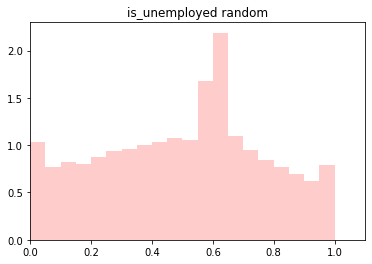

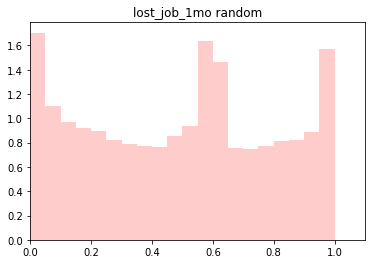

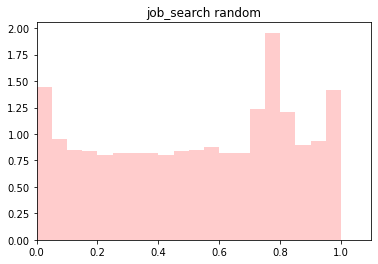

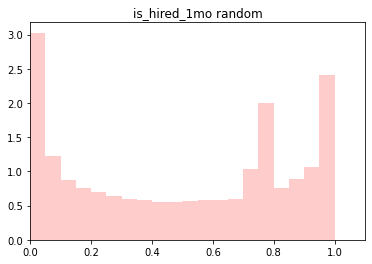

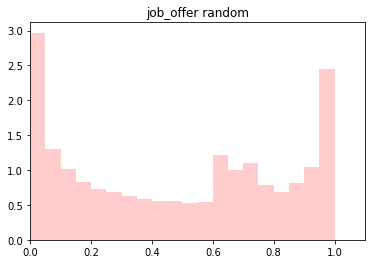

In [6]:
# 2000 tweets boundary step 0.1
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_offer': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_GLOVE/{}/'.format(column)

    start_time = time.time()

#     model_output_random = [f for f in glob.glob(model_output_path+'random*.csv')]
#     print(model_output_random)
    
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)

    
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_random.shape)

#     print(merged_random.head())
#     start_time = time.time()
# #     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
#     merged_random[['neg', 'pos_model']] = softmax(merged_random[['first', 'second']], axis=1)
#     print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_random, open( "./pickles/{}_GLOVE_merged_random_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_random   = merged_random[['tweet_id', 'glove_pos_model', 'text']]
#     print(merged_random.head())
    
    merged_random = merged_random.drop_duplicates(['text'])
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['glove_pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
#     ax.set_yscale('log')
    plt.xlim(0,1.1)


    print(column)
#     start_time = time.time()
#     sort_merged_random = merged_random.sort_values(by=['glove_pos_model'], ascending=False)
#     print('random', sort_merged_random[['glove_pos_model', 'text']].head())
#     sort_merged_random = sort_merged_random[['tweet_id', 'glove_pos_model', 'text']]
#     sort_merged_random.head(30000).to_csv('csv/GLOVE_random_pos_30000_{}.csv'.format(column), index = False)


    all_tweets_for_sam = pd.DataFrame()
    for boundary in boundary_list:

        print('boundary', boundary)

    #         boundary = boundary_dict['random'][column]
        merged_random['dist_point{}'.format(boundary)] = abs(merged_random['glove_pos_model'] - boundary)

        start_time = time.time()
        print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

        start_time = time.time()
        merged_random = merged_random.sort_values(by=['dist_point{}'.format(boundary)], ascending=True)
        print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

        start_time = time.time()

        data_to_export = merged_random[:2000][['tweet_id', 'glove_pos_model', 'text']]

    #         del merged_random

        print(data_to_export.shape)
    #         data_to_export.to_csv('csv_boundary_step/BERT_ST_random_{}_point_{}.csv'.format(column, boundary))
        # print(all_random_boundary['text'])
        print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')   

        all_tweets_for_sam = pd.concat([all_tweets_for_sam, data_to_export])

#         break
        
    all_tweets_for_sam.to_csv('csv_boundary_step/GLOVE_ST_random_ALL_{}.csv'.format(column), index = False)
    
#     break

    
#     break

In [18]:
# filtered contains 0.8G of data!!
import time
start_time = time.time()
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
month = '2012-1'
path_to_data = '/scratch/spf248/twitter/data/classification/US/filtered_10perct_sample/'
tweets_filtered=pq.ParquetDataset(glob(os.path.join(path_to_data,                                           
#                                            country_code,
#                                            month,
                                           '*.parquet'))).read().to_pandas()
tweets_filtered['tweet_id'] = tweets_filtered['tweet_id'].astype(int)
print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds')
print(tweets_filtered.shape)

time taken to load filtered sample: 33.06021332740784 seconds
(9215824, 11)


In [19]:
# save the full 10M file
# all in one loop
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)


for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_offer': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_GLOVE/{}/'.format(column)

    start_time = time.time()

#     model_output_filtered = [f for f in glob.glob(model_output_path+'filtered*.csv')]
#     print(model_output_filtered)
    
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)

    
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)

    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

#     print(merged_filtered.head())
#     start_time = time.time()
# #     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
#     merged_filtered[['neg', 'pos_model']] = softmax(merged_filtered[['first', 'second']], axis=1)
#     print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_filtered, open( "./pickles/{}_GLOVE_merged_filtered_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered   = merged_filtered[['tweet_id', 'glove_pos_model', 'text']]
    merged_filtered.columns = ['tweet_id', '{}'.format(column), 'text']
    
#     print(merged_filtered.shape())
    
    merged_filtered = merged_filtered.drop_duplicates(['text'])
    
    
    if column == 'is_unemployed':
        multi_col_all_tweets = merged_filtered
    else:
        multi_col_all_tweets = pd.merge(multi_col_all_tweets, merged_filtered, how='inner', on = 'tweet_id')
    
    print(multi_col_all_tweets.shape)
    print(multi_col_all_tweets.head())

    
#     break
multi_col_all_tweets = multi_col_all_tweets[['tweet_id', 'text', "is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]]
multi_col_all_tweets.head()
multi_col_all_tweets.to_parquet('turk10M/multi_col_all_tweets_GLOVE_filtered.parquet')
    
    

boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
time taken to load filtered sample: 13.512434005737305 seconds (7935382, 3)
time taken to merge: 7.346224546432495 seconds (7935382, 13)
(7289242, 3)
             tweet_id  is_unemployed  \
0  423292481703133184       0.073710   
1  423294524249899008       0.787542   
2  423294755230191616       0.666449   
3  423294755280527360       0.808788   
4  423294788587098112       0.085942   

                                                text  
0  S/O to the wrestling team for doin work tonigh...  
1  RT @UniteWomenMil: Millions Of Unemployed Amer...  
2  RT @jessieeuhhlease: I need to find me a new j...  
3                     Ready for some brew after work  
4  RT @TEK_GrandRapids: Network Administrator - T...  


 lost_job_1mo
time taken to load filtered sample: 12.338221073150635 seconds (7935382, 3)
time taken to merge: 7.481170654296875 seconds (7935382, 13)
(7289242, 5)
             tweet_id  is_

In [21]:
print(multi_col_all_tweets.shape)
print(multi_col_all_tweets.head())

(7289242, 7)
             tweet_id                                               text  \
0  423292481703133184  S/O to the wrestling team for doin work tonigh...   
1  423294524249899008  RT @UniteWomenMil: Millions Of Unemployed Amer...   
2  423294755230191616  RT @jessieeuhhlease: I need to find me a new j...   
3  423294755280527360                     Ready for some brew after work   
4  423294788587098112  RT @TEK_GrandRapids: Network Administrator - T...   

   is_unemployed  lost_job_1mo  job_search  is_hired_1mo  job_offer  
0       0.073710      0.030659    0.321978      0.432426   0.952165  
1       0.787542      0.970304    0.086970      0.358985   0.782980  
2       0.666449      0.550482    0.996328      0.962633   0.928559  
3       0.808788      0.611137    0.719713      0.256435   0.867299  
4       0.085942      0.144542    0.067384      0.353260   0.976839  


boundary_list [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


 is_unemployed
time taken to load filtered sample: 4.3056347370147705 seconds (7935382, 3)
time taken to merge: 7.237027168273926 seconds (7935382, 13)
is_unemployed
boundary 1.0
is_unemployed filtered subtraction time taken: 2.6226043701171875e-06 seconds
is_unemployed filtered sorting time taken: 3.4852287769317627 seconds
(2000, 3)
is_unemployed filtered write csv time taken: 0.002140045166015625 seconds
boundary 0.9
is_unemployed filtered subtraction time taken: 2.6226043701171875e-06 seconds
is_unemployed filtered sorting time taken: 1.1894793510437012 seconds
(2000, 3)
is_unemployed filtered write csv time taken: 0.0038559436798095703 seconds
boundary 0.8
is_unemployed filtered subtraction time taken: 2.1457672119140625e-06 seconds
is_unemployed filtered sorting time taken: 1.4796533584594727 seconds
(2000, 3)
is_unemployed filtered write csv time taken: 0.0027124881744384766 seconds
boundary 0.7
is_unemploye

job_search filtered sorting time taken: 2.0423810482025146 seconds
(2000, 3)
job_search filtered write csv time taken: 0.0024526119232177734 seconds


 is_hired_1mo
time taken to load filtered sample: 12.128740787506104 seconds (7935382, 3)
time taken to merge: 7.589390754699707 seconds (7935382, 13)
is_hired_1mo
boundary 1.0
is_hired_1mo filtered subtraction time taken: 4.291534423828125e-06 seconds
is_hired_1mo filtered sorting time taken: 3.7026383876800537 seconds
(2000, 3)
is_hired_1mo filtered write csv time taken: 0.0028619766235351562 seconds
boundary 0.9
is_hired_1mo filtered subtraction time taken: 2.384185791015625e-06 seconds
is_hired_1mo filtered sorting time taken: 1.343522548675537 seconds
(2000, 3)
is_hired_1mo filtered write csv time taken: 0.002393960952758789 seconds
boundary 0.8
is_hired_1mo filtered subtraction time taken: 2.1457672119140625e-06 seconds
is_hired_1mo filtered sorting time taken: 1.3309247493743896 seconds
(2000, 3)
is_hired_1mo filtered write csv ti

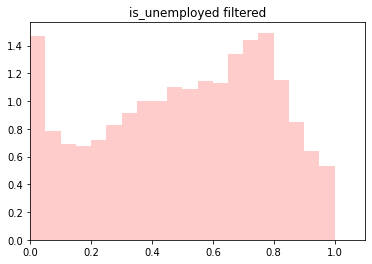

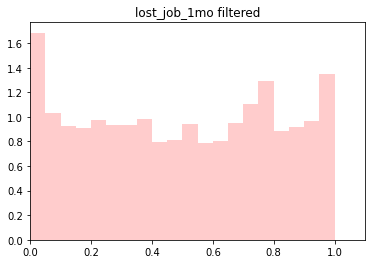

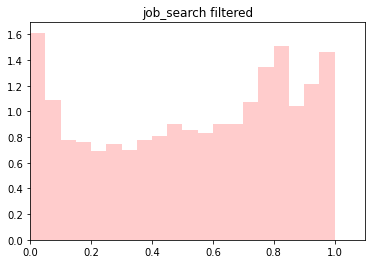

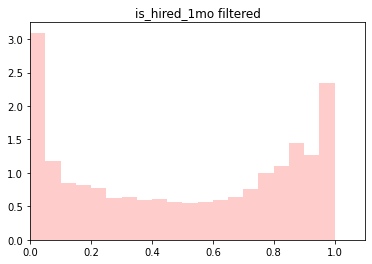

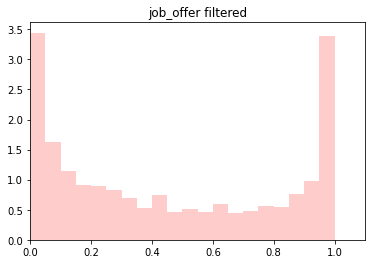

In [9]:
# all in one loop
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax

import numpy as np
boundary_list = [i/10.0 for i in range(11)]
boundary_list.reverse()

print('boundary_list', boundary_list)

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print('\n\n', column)
    
#     if column != 'job_offer': continue
    
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/jobs/running_on_200Msamples/pred_output_10pct_sample_GLOVE/{}/'.format(column)

    start_time = time.time()

#     model_output_filtered = [f for f in glob.glob(model_output_path+'filtered*.csv')]
#     print(model_output_filtered)
    
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)

    
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)

    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

#     print(merged_filtered.head())
#     start_time = time.time()
# #     based on https://github.com/ThilinaRajapakse/simpletransformers/issues/30
#     merged_filtered[['neg', 'pos_model']] = softmax(merged_filtered[['first', 'second']], axis=1)
#     print('time softmax:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     pickle.dump( merged_filtered, open( "./pickles/{}_GLOVE_merged_filtered_1pct.pkl".format(column), "wb" ) )
#     print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered   = merged_filtered[['tweet_id', 'glove_pos_model', 'text']]
#     print(merged_filtered.head())
    
    merged_filtered = merged_filtered.drop_duplicates(['text'])
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_filtered['glove_pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' filtered')
#     ax.set_yscale('log')
    plt.xlim(0,1.1)


    print(column)
#     start_time = time.time()
#     sort_merged_filtered = merged_filtered.sort_values(by=['glove_pos_model'], ascending=False)
#     print('filtered', sort_merged_filtered[['glove_pos_model', 'text']].head())
#     sort_merged_filtered = sort_merged_filtered[['tweet_id', 'glove_pos_model', 'text']]
#     sort_merged_filtered.head(30000).to_csv('csv/GLOVE_filtered_pos_30000_{}.csv'.format(column), index = False)


    all_tweets_for_sam = pd.DataFrame()
    for boundary in boundary_list:

        print('boundary', boundary)

    #         boundary = boundary_dict['filtered'][column]
        merged_filtered['dist_point{}'.format(boundary)] = abs(merged_filtered['glove_pos_model'] - boundary)

        start_time = time.time()
        print(column, 'filtered subtraction time taken:', str(time.time() - start_time), 'seconds')

        start_time = time.time()
        merged_filtered = merged_filtered.sort_values(by=['dist_point{}'.format(boundary)], ascending=True)
        print(column, 'filtered sorting time taken:', str(time.time() - start_time), 'seconds')

        start_time = time.time()

        data_to_export = merged_filtered[:2000][['tweet_id', 'glove_pos_model', 'text']]

    #         del merged_filtered

        print(data_to_export.shape)
    #         data_to_export.to_csv('csv_boundary_step/BERT_ST_filtered_{}_point_{}.csv'.format(column, boundary))
        # print(all_filtered_boundary['text'])
        print(column, 'filtered write csv time taken:', str(time.time() - start_time), 'seconds')   

        all_tweets_for_sam = pd.concat([all_tweets_for_sam, data_to_export])

#         break
        
    all_tweets_for_sam.to_csv('csv_boundary_step/GLOVE_ST_filtered_ALL_{}.csv'.format(column), index = False)
    
#     break

    
#     break

In [3]:
all_tweets_for_sam = all_tweets_for_sam[['tweet_id', 'text']]
print(all_tweets_for_sam.head())
all_tweets_for_sam = all_tweets_for_sam.sample(frac=1, random_state = 10)
print(all_tweets_for_sam.head())

                   tweet_id  pos_model                                  text  \
2441891  728443901963444224   0.938718                  I got fired today. 😂   
3778048  785875357358358529   0.936386       I was fired today. I'm a badass   
4376444  336917153766834177   0.935609              Lol Vinny just got fired   
4449522  285522710845603841   0.934539     Andy Reid got fired... About time   
9364723  496205184654008321   0.934478  i got fired  https://t.co/FjMrgTf8kJ   

         dist_point1.0  dist_point0.98  
2441891       0.061282             NaN  
3778048       0.063614             NaN  
4376444       0.064391             NaN  
4449522       0.065461             NaN  
9364723       0.065522             NaN  
                   tweet_id  pos_model  \
7404936  449274903259525120   0.909658   
2448643  735159225807077377   0.895422   
2784560  658630970313199619   0.894582   
3379363  354687392130674689   0.979743   
1785206  505995696940392448   0.961351   

                    

In [5]:
import pickle
pickle.dump( all_tweets_for_sam, open( "export/GLOVE_iteration1.pickle", "wb" ) )
all_tweets_for_sam.to_parquet('export/GLOVE_iteration1.parquet')
all_tweets_for_sam.to_csv('export/GLOVE_iteration1.csv', index = False)

In [ ]:
# entropy
import glob
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np

boundary = 0.5

for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    print(column)
    start_time = time.time()
    model_output_path = '/scratch/da2734/twitter/running_on_200Msamples/pred_output/{}/'.format(column)
    model_output_filtered = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'filtered*.csv')], ignore_index = True)
    print('time taken to load filtered sample:', str(time.time() - start_time), 'seconds', model_output_filtered.shape)


    start_time = time.time()
    model_output_random = pd.concat([pd.read_csv(f) for f in glob.glob(model_output_path+'random*.csv')], ignore_index = True)
    print('time taken to load random sample:', str(time.time() - start_time), 'seconds', model_output_random.shape)


    start_time = time.time()
    merged_filtered = pd.merge(model_output_filtered, tweets_filtered, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    merged_random = pd.merge(model_output_random, tweets_random, how='inner', on = 'tweet_id')
    print('time taken to merge:', str(time.time() - start_time), 'seconds', merged_filtered.shape)

    start_time = time.time()
    pickle.dump( merged_filtered, open( "./top_tweets/{}_merged_filtered.pkl".format(column), "wb" ) )
    pickle.dump( merged_random, open( "./top_tweets/{}_merged_random.pkl".format(column), "wb" ) )
    print('time taken to dump:', str(time.time() - start_time), 'seconds')

    merged_filtered = merged_filtered[['neg_model', 'pos_model', 'text']]
    merged_random   = merged_random[['neg_model', 'pos_model', 'text']]
    
#     merged_random = merged_random[merged_random['pos_model'] > 0.5 ]

    merged_filtered['entropy'] = - merged_filtered['pos_model']*(np.log(merged_filtered['pos_model']))
    merged_random['entropy'] = - merged_random['pos_model']*(np.log(merged_random['pos_model']))
    
#     merged_filtered = merged_filtered[merged_filtered['pos_model'] > 0.5 ]

    
    print(column)
    fig = plt.figure()
    ax = plt.subplot(111)
#     plt.hist(merged_filtered['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.hist(merged_filtered['entropy'], bins=20, density = True, color = 'red', alpha = 0.2)    
    plt.title(column+' filtered')
#     ax.set_yscale('log')
#     plt.xlim(0,1.1)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(merged_random['entropy'], bins=20, density = True, color = 'red', alpha = 0.2)
#     plt.hist(merged_random['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
    plt.title(column+' random')
#     ax.set_yscale('log')
#     plt.xlim(0,1.1)
    
#     print(column)
#     start_time = time.time()
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_pos_100.csv'.format(column))
#     print(sort_merged_filtered.head())
    
#     sort_merged_filtered = merged_filtered.sort_values(by=['pos_model'], ascending=True)
#     sort_merged_filtered.head(100).to_csv('top_tweets/filtered_{}_neg_100.csv'.format(column))
#     print(sort_merged_filtered.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')

#     print(column)
#     start_time = time.time()
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=False)
#     sort_merged_random.head(100).to_csv('top_tweets/random_{}_pos_100.csv'.format(column))
#     print(sort_merged_random.head())
    
#     sort_merged_random = merged_random.sort_values(by=['pos_model'], ascending=True)
#     sort_merged_random.head(100).to_csv('top_tweets/random_{}_neg_100.csv'.format(column))
#     print(sort_merged_random.head())
#     print('time taken to save csv:', str(time.time() - start_time), 'seconds')


#     merged_filtered['dist_point5'] = abs(merged_filtered['pos_model'] - boundary)

#     start_time = time.time()
#     print(column, 'filtered subtraction time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_filtered = merged_filtered.sort_values(by=['dist_point5'], ascending=True)
#     print(column, 'filtered sorting time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_filtered[:100].to_csv('top_tweets/filtered_{}_point5.csv'.format(column))
#     # print(all_filtered_boundary['text'])
#     print(column, 'filtered write csv time taken:', str(time.time() - start_time), 'seconds')


#     merged_random['dist_point5'] = abs(merged_random['pos_model'] - boundary)

#     start_time = time.time()
#     print(column, 'random subtraction time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_random = merged_random.sort_values(by=['dist_point5'], ascending=True)
#     print(column, 'random sorting time taken:', str(time.time() - start_time), 'seconds')

#     start_time = time.time()
#     merged_random[:100].to_csv('top_tweets/random_{}_point5.csv'.format(column))
#     # print(all_random_boundary['text'])
#     print(column, 'random write csv time taken:', str(time.time() - start_time), 'seconds')    
    
    
#     break